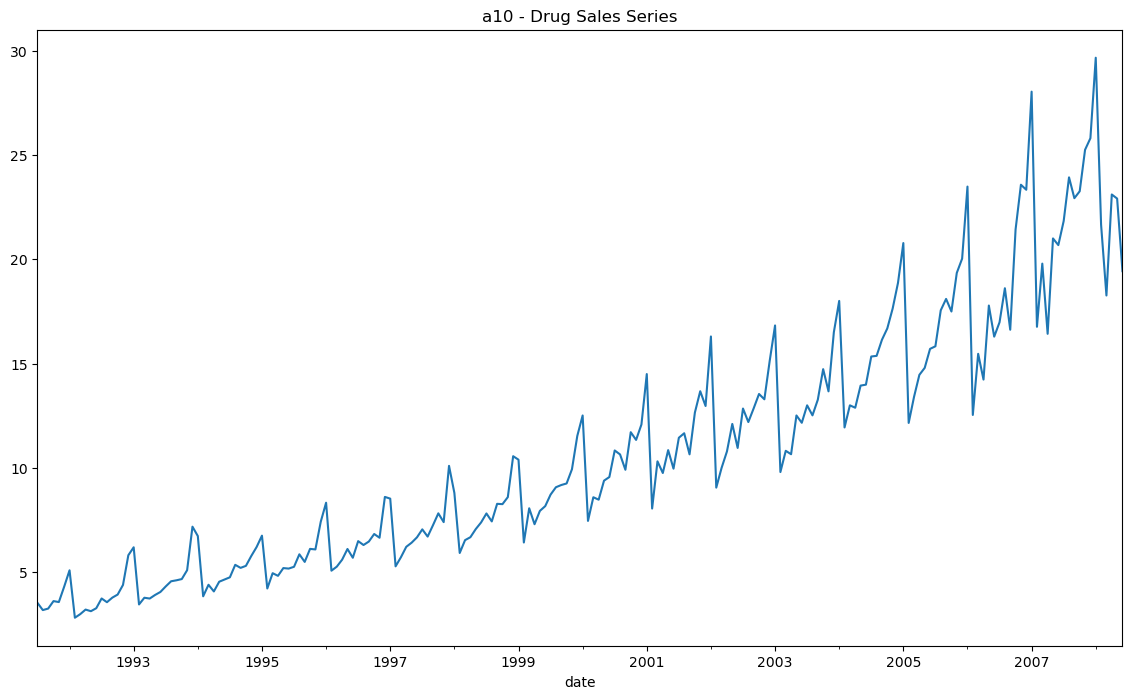

In [1]:
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');

In [2]:
# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: 3.145185689306732
n_lags: 1.0
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


#### __Conclusión__

En el caso del ejemplo de arriba, vemos que, en efecto, el p-valor es mayor que el nivel de significancia seleccionado, que en este caso sería 0.05. 

También se puede observar que el valor del estadístico es __-7.4715740767231456__, que es menor que el valor crítico del percentil 5% (0.05) siendo este __-2.8918307730370025__, por lo que se puede determinar que se puede rechazar la hipótesis nula, que dice que la serie __NO__ es estacionaria.

## ADF Test on stationary series

In [3]:
# ADF test on random numbers
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.745972104096895
p-value: 2.7412984490286895e-19
Critial Values:
   1%, -3.498198082189098
Critial Values:
   5%, -2.891208211860468
Critial Values:
   10%, -2.5825959973472097


#### __Conclusión__

Por el contrario, vemos que en el segundo ejemplo, el p-valor es 2.71e-19, valor bastante mas pequeño que 
0.05 (valor de significación), además, el valor del estadístico es menor que el valor del percentil 5%, por lo que podemos aceptar la hipótesis nula (H0) y afirmar que la serie es estacionaria.

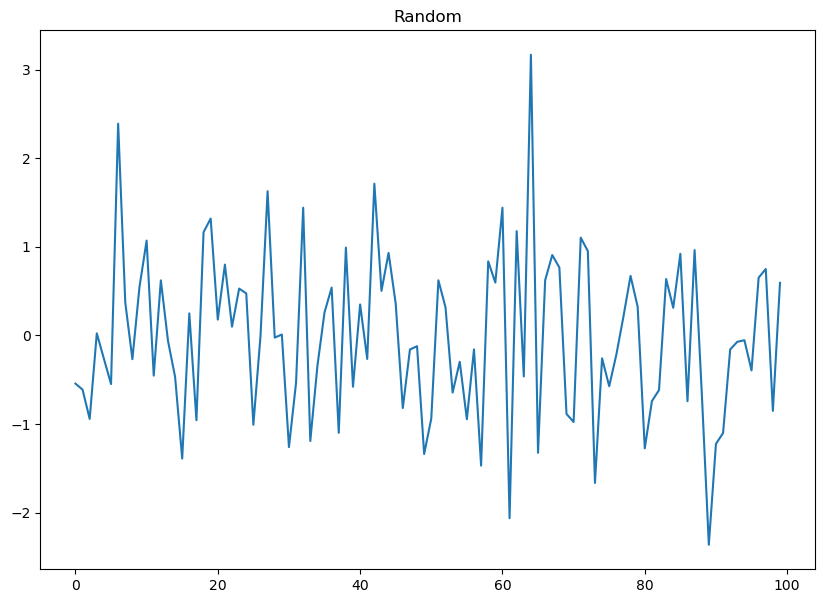

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(series);
plt.title('Random');